# Data preparation for the statistical approach

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import gamma, chi2, norm

In [ ]:
df_delhi = pd.read_csv('delhi.csv')
df_bangalore = pd.read_csv('bangalore.csv')
df_mumbai = pd.read_csv('mumbai.csv')
df_chennai = pd.read_csv('chennai.csv')

In [ ]:
# Getting the rain data
df_delhi['rain'] = df_delhi['prcp'].fillna(0).apply(lambda x: 1 if x > 0 else 0)
df_bangalore['rain'] = df_bangalore['prcp'].fillna(0).apply(lambda x: 1 if x > 0 else 0)
df_mumbai['rain'] = df_mumbai['prcp'].fillna(0).apply(lambda x: 1 if x > 0 else 0)
df_chennai['rain'] = df_chennai['prcp'].fillna(0).apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# Convert 'time' to datetime format
df_delhi['time'] = pd.to_datetime(df_delhi['time'], dayfirst=True)
df_mumbai['time'] = pd.to_datetime(df_mumbai['time'], dayfirst=True)
df_bangalore['time'] = pd.to_datetime(df_bangalore['time'], dayfirst=True)
df_chennai['time'] = pd.to_datetime(df_chennai['time'], dayfirst=True)


# drop tmin, tmax and prcp columns
cols=['tmin', 'tmax', 'prcp']
df_delhi = df_delhi.drop(cols, axis=1)
df_mumbai = df_mumbai.drop(cols, axis=1)
df_bangalore = df_bangalore.drop(cols , axis=1)
df_chennai = df_chennai.drop(cols, axis=1)

# rename columns
df_delhi = df_delhi.rename(columns={'tavg': 'temperature'})
df_mumbai = df_mumbai.rename(columns={'tavg': 'temperature'})
df_bangalore = df_bangalore.rename(columns={'tavg': 'temperature'})
df_chennai = df_chennai.rename(columns={'tavg': 'temperature'})

# convert temperature to numeric
df_delhi['temperature'] = pd.to_numeric(df_delhi['temperature'], errors='coerce')
df_mumbai['temperature'] = pd.to_numeric(df_mumbai['temperature'], errors='coerce')
df_bangalore['temperature'] = pd.to_numeric(df_bangalore['temperature'], errors='coerce')
df_chennai['temperature'] = pd.to_numeric(df_chennai['temperature'], errors='coerce')

# drop rows with NaN values
df_delhi = df_delhi.dropna()
df_mumbai = df_mumbai.dropna()
df_bangalore = df_bangalore.dropna()
df_chennai = df_chennai.dropna()

# Part 1: Point Estimation

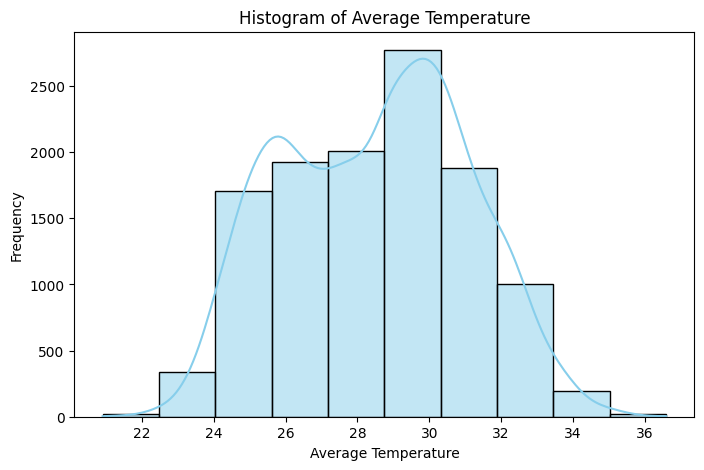

In [ ]:
# Histogram of average temperature of Chennai
plt.figure(figsize=(8, 5))
sns.histplot(df_chennai['temperature'], kde=True, bins=10, color='skyblue')
plt.title("Histogram of Average Temperature")
plt.xlabel("Average Temperature")
plt.ylabel("Frequency")
plt.show()

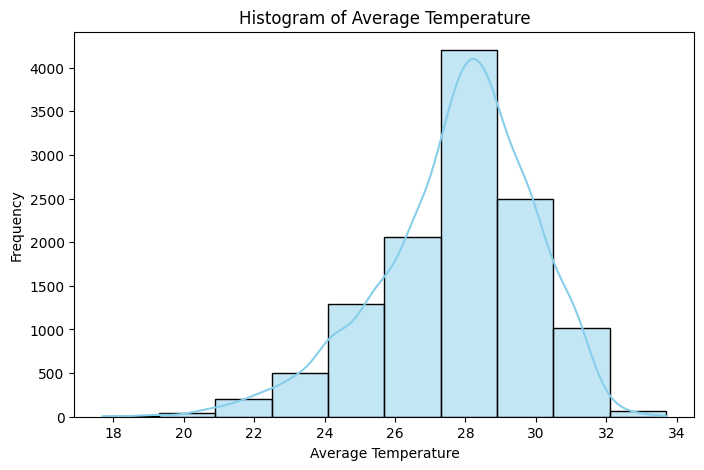

In [ ]:
# Histogram of average temperature of Mumbai
plt.figure(figsize=(8, 5))
sns.histplot(df_mumbai['temperature'], kde=True, bins=10, color='skyblue')
plt.title("Histogram of Average Temperature")
plt.xlabel("Average Temperature")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Extract the data of Chennai
x = df_chennai['temperature'].values

# Sample mean and variance
sample_mean = np.mean(x)
sample_var = np.var(x, ddof=1)

# MoM estimates
a_mom = sample_mean**2 / sample_var
b_mom = sample_var / sample_mean

print(f"MoM Estimates:\na = {a_mom:.4f}, b = {b_mom:.4f}")

MoM Estimates:
a = 119.5416, b = 0.2383


In [ ]:
# Fit gamma distribution using scipy's MLE
a_mle, loc_mle, scale_mle = gamma.fit(x, floc=0)  # Set location to 0 for standard gamma

print(f"MLE Estimates:\na = {a_mle:.4f}, b (scale) = {scale_mle:.4f}")

MLE Estimates:
a = 118.5533, b (scale) = 0.2403


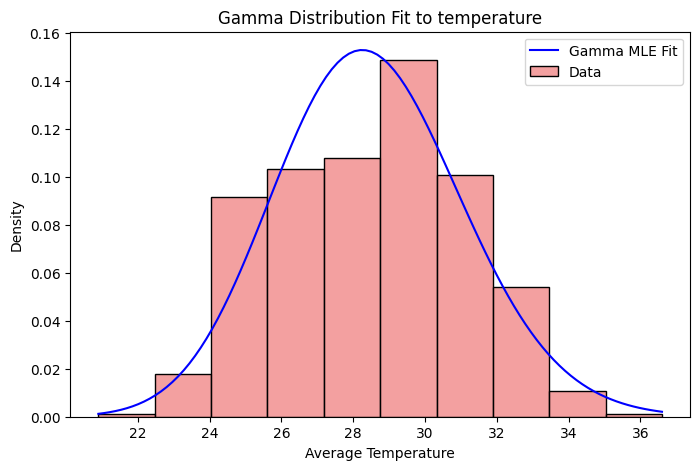

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(x, bins=10, kde=False, stat='density', color='lightcoral', label='Data')

x_vals = np.linspace(min(x), max(x), 100)
plt.plot(x_vals, gamma.pdf(x_vals, a=a_mle, scale=scale_mle), 'b-', label='Gamma MLE Fit')
plt.title("Gamma Distribution Fit to temperature")
plt.xlabel("Average Temperature")
plt.ylabel("Density")
plt.legend()
plt.show()

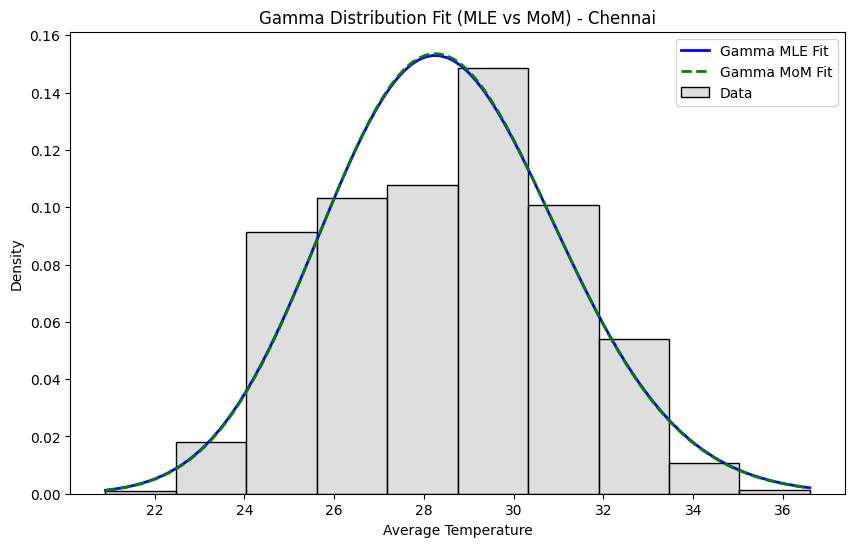

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x, bins=10, kde=False, stat='density', color='lightgray', label='Data')

x_vals = np.linspace(min(x), max(x), 100)
plt.plot(x_vals, gamma.pdf(x_vals, a=a_mle, scale=scale_mle), 'b-', lw=2, label='Gamma MLE Fit')
plt.plot(x_vals, gamma.pdf(x_vals, a=a_mom, scale=b_mom), 'g--', lw=2, label='Gamma MoM Fit')

plt.title("Gamma Distribution Fit (MLE vs MoM) - Chennai")
plt.xlabel("Average Temperature")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
# Extract the data of Mumbai
x = df_mumbai['temperature'].values

# Sample mean and variance
sample_mean = np.mean(x)
sample_var = np.var(x, ddof=1)

# MoM estimates
a_mom = sample_mean**2 / sample_var
b_mom = sample_var / sample_mean

print(f"MoM Estimates:\na = {a_mom:.4f}, b = {b_mom:.4f}")

MoM Estimates:
a = 160.8316, b = 0.1726


In [ ]:
# Fit gamma distribution using scipy's MLE
a_mle, loc_mle, scale_mle = gamma.fit(x, floc=0)  # Set location to 0 for standard gamma

print(f"MLE Estimates:\na = {a_mle:.4f}, b (scale) = {scale_mle:.4f}")

MLE Estimates:
a = 153.6448, b (scale) = 0.1807


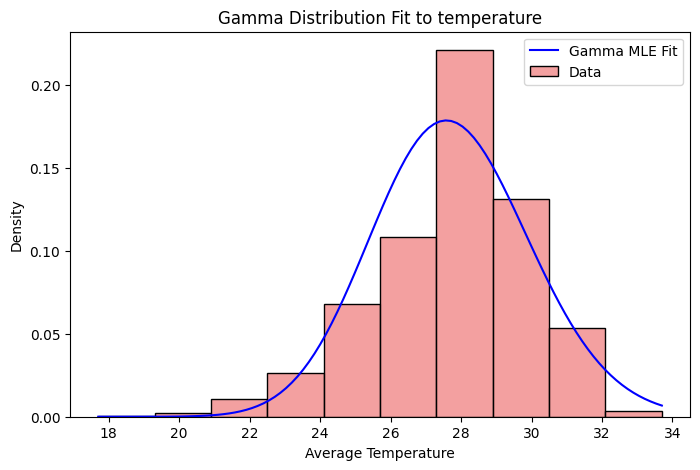

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(x, bins=10, kde=False, stat='density', color='lightcoral', label='Data')

x_vals = np.linspace(min(x), max(x), 100)
plt.plot(x_vals, gamma.pdf(x_vals, a=a_mle, scale=scale_mle), 'b-', label='Gamma MLE Fit')
plt.title("Gamma Distribution Fit to temperature")
plt.xlabel("Average Temperature")
plt.ylabel("Density")
plt.legend()
plt.show()

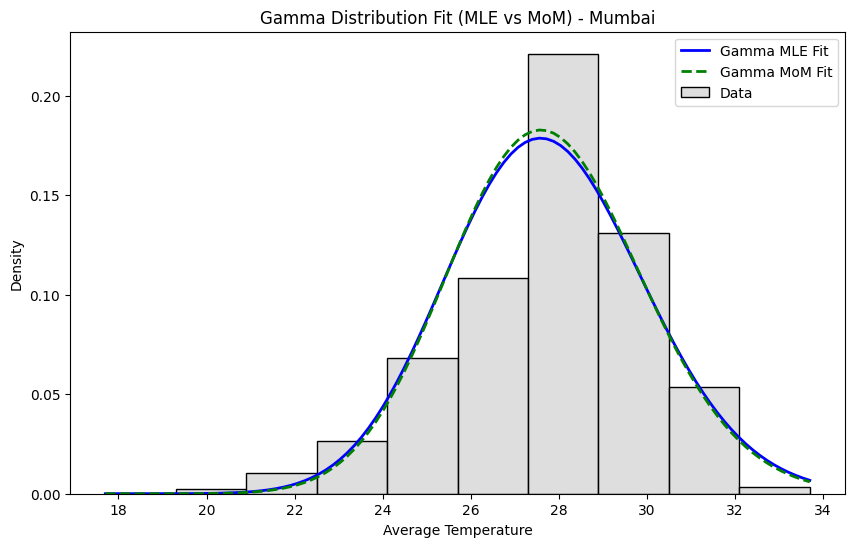

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x, bins=10, kde=False, stat='density', color='lightgray', label='Data')

x_vals = np.linspace(min(x), max(x), 100)
plt.plot(x_vals, gamma.pdf(x_vals, a=a_mle, scale=scale_mle), 'b-', lw=2, label='Gamma MLE Fit')
plt.plot(x_vals, gamma.pdf(x_vals, a=a_mom, scale=b_mom), 'g--', lw=2, label='Gamma MoM Fit')

plt.title("Gamma Distribution Fit (MLE vs MoM) - Mumbai")
plt.xlabel("Average Temperature")
plt.ylabel("Density")
plt.legend()
plt.show()

# Part 2: Interval Estimation

In [ ]:
# Sample variance and size of Chennai data
x = df_chennai['temperature'].values
s2 = np.var(x, ddof=1)
n = len(x)

# Confidence level
alpha = 0.05

# CI for variance using Chi-squared
chi2_lower = chi2.ppf(1 - alpha/2, df=n - 1)
chi2_upper = chi2.ppf(alpha/2, df=n - 1)

ci_lower = (n - 1) * s2 / chi2_lower
ci_upper = (n - 1) * s2 / chi2_upper

print(f"95% Confidence Interval for Variance:\nLower = {ci_lower:.4f}, Upper = {ci_upper:.4f}")


95% Confidence Interval for Variance:
Lower = 6.6208, Upper = 6.9665


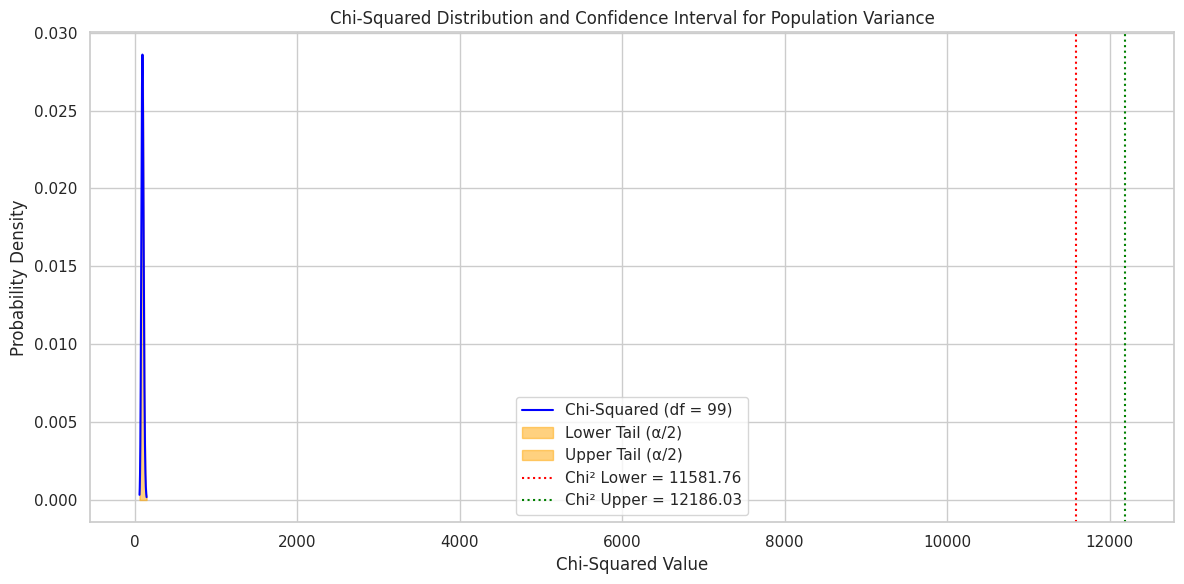

In [ ]:
df_ = n - 1
x_vals = np.linspace(chi2.ppf(0.001, df_), chi2.ppf(0.999, df_), 500)
pdf_vals = chi2.pdf(x_vals, df_)

# Plot the chi-squared distribution
plt.figure(figsize=(12, 6))
plt.plot(x_vals, pdf_vals, color='blue', label=f'Chi-Squared (df = {df_})')

# Fill critical regions
plt.fill_between(x_vals, 0, pdf_vals, where=(x_vals <= chi2_upper), color='orange', alpha=0.5, label='Lower Tail (α/2)')
plt.fill_between(x_vals, 0, pdf_vals, where=(x_vals >= chi2_lower), color='orange', alpha=0.5, label='Upper Tail (α/2)')

# Add vertical lines for critical values
plt.axvline(chi2_upper, color='red', linestyle=':', label=f'Chi² Lower = {chi2_upper:.2f}')
plt.axvline(chi2_lower, color='green', linestyle=':', label=f'Chi² Upper = {chi2_lower:.2f}')

# Annotate CI on variance scale
plt.title('Chi-Squared Distribution and Confidence Interval for Population Variance')
plt.xlabel('Chi-Squared Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Sample variance and size of Mumbai data
x = df_mumbai['temperature'].values
s2 = np.var(x, ddof=1)
n = len(x)

# Confidence level
alpha = 0.05

# CI for variance using Chi-squared
chi2_lower = chi2.ppf(1 - alpha/2, df=n - 1)
chi2_upper = chi2.ppf(alpha/2, df=n - 1)

ci_lower = (n - 1) * s2 / chi2_lower
ci_upper = (n - 1) * s2 / chi2_upper

print(f"95% Confidence Interval for Variance:\nLower = {ci_lower:.4f}, Upper = {ci_upper:.4f}")


95% Confidence Interval for Variance:
Lower = 4.6728, Upper = 4.9166


# Part 3: Confidence Interval for difference between Sample Means

## Difference between the average temperature of Delhi and Mumbai

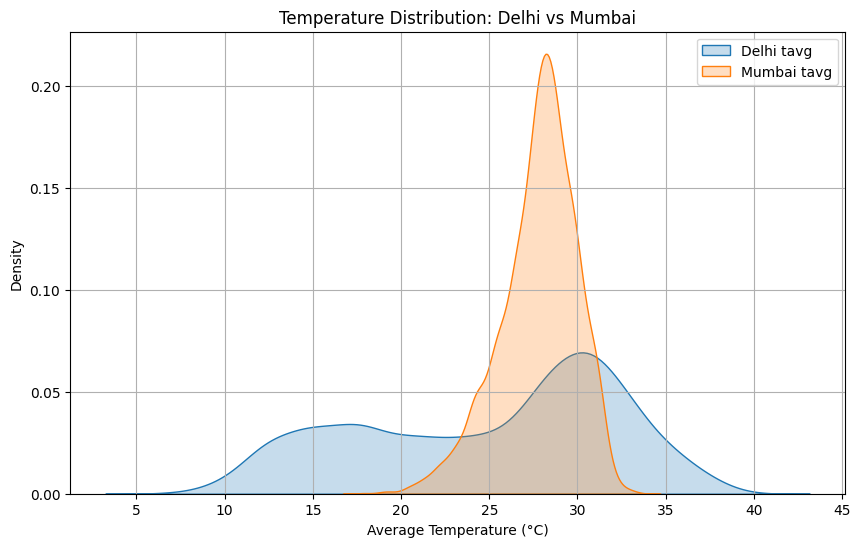

In [ ]:
tavg_delhi = df_delhi['temperature']
tavg_mumbai = df_mumbai['temperature']

# --- Visualization of distributions ---
plt.figure(figsize=(10, 6))
sns.kdeplot(tavg_delhi, label='Delhi tavg', fill=True)
sns.kdeplot(tavg_mumbai, label='Mumbai tavg', fill=True)
plt.title('Temperature Distribution: Delhi vs Mumbai')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

95% Confidence interval for the difference in means (Delhi - Mumbai): (np.float64(-2.9036179687148502), np.float64(-2.6285704574230495))


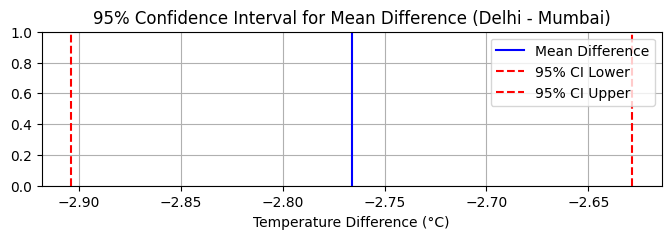

In [ ]:
alpha = 0.05

n = len(tavg_delhi)
m = len(tavg_mumbai)

# Degrees of freedom for pooled variance
df = n + m - 2

# Upper alpha/2 point for t-distribution
t_alpha = stats.t.ppf(1 - alpha / 2, df)

# Sample variances
s1 = np.var(tavg_delhi, ddof=1)
s2 = np.var(tavg_mumbai, ddof=1)

# Pooled standard error
pooled_var = ((n - 1) * s1 + (m - 1) * s2) / df
se_pooled = np.sqrt((1/n + 1/m) * pooled_var)

# Sample means
mean1 = np.mean(tavg_delhi)
mean2 = np.mean(tavg_mumbai)
mean_diff = mean1 - mean2

# Margin of error
margin = t_alpha * se_pooled

# Confidence interval for difference in means
ci_lower = mean_diff - margin
ci_upper = mean_diff + margin
confidence_interval = (ci_lower, ci_upper)

print(f"95% Confidence interval for the difference in means (Delhi - Mumbai): {confidence_interval}")

# --- Visualization of confidence interval ---
plt.figure(figsize=(8, 2))
plt.axvline(mean_diff, color='blue', label='Mean Difference')
plt.axvline(ci_lower, color='red', linestyle='--', label='95% CI Lower')
plt.axvline(ci_upper, color='red', linestyle='--', label='95% CI Upper')
plt.title('95% Confidence Interval for Mean Difference (Delhi - Mumbai)')
plt.xlabel('Temperature Difference (°C)')
plt.legend()
plt.grid(True)
plt.show()

## Difference between the average temperature of Chennai and Bangalore

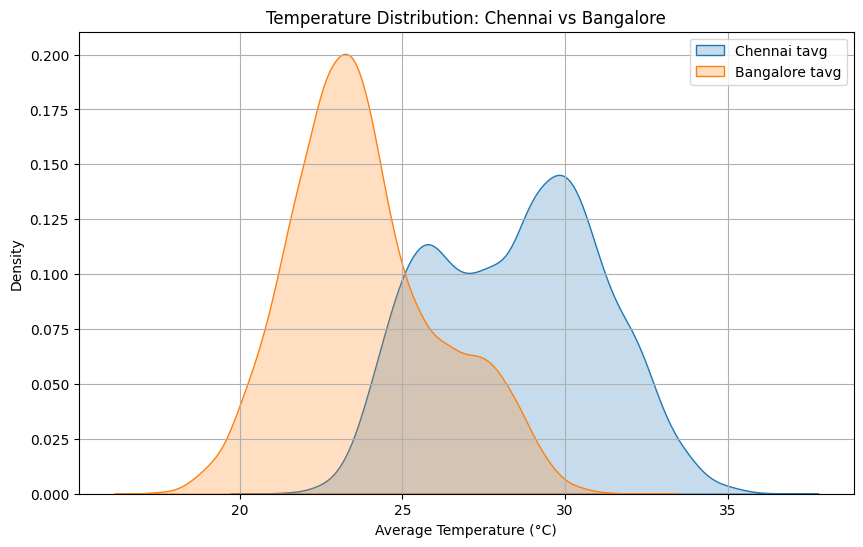

In [ ]:
tavg_chennai = df_chennai['temperature']
tavg_bangalore = df_bangalore['temperature']

# --- Visualization of distributions ---
plt.figure(figsize=(10, 6))
sns.kdeplot(tavg_chennai, label='Chennai tavg', fill=True)
sns.kdeplot(tavg_bangalore, label='Bangalore tavg', fill=True)
plt.title('Temperature Distribution: Chennai vs Bangalore')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

95% Confidence interval for the difference in means (Chennai - Bangalore): (np.float64(4.58765270593967), np.float64(4.71309081326101))
Mean difference: 4.65037175960034


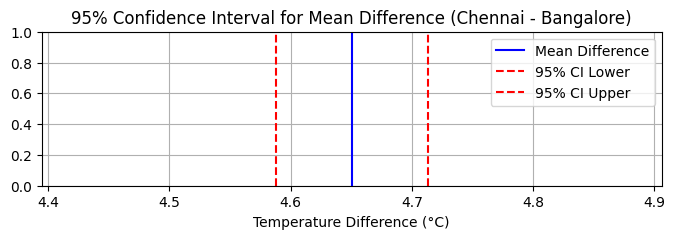

In [ ]:
alpha = 0.05

n = len(tavg_chennai)
m = len(tavg_bangalore)

# Degrees of freedom for pooled variance
df = n + m - 2

# Upper alpha/2 point for t-distribution
t_alpha = stats.t.ppf(1 - alpha / 2, df)

# Sample variances
s1 = np.var(tavg_chennai, ddof=1)
s2 = np.var(tavg_bangalore, ddof=1)

# Pooled standard error
pooled_var = ((n - 1) * s1 + (m - 1) * s2) / df
se_pooled = np.sqrt((1/n + 1/m) * pooled_var)

# Sample means
mean1 = np.mean(tavg_chennai)
mean2 = np.mean(tavg_bangalore)
mean_diff = mean1 - mean2

# Margin of error
margin = t_alpha * se_pooled

# Confidence interval for difference in means
ci_lower = mean_diff - margin
ci_upper = mean_diff + margin
confidence_interval = (ci_lower, ci_upper)

print(f"95% Confidence interval for the difference in means (Chennai - Bangalore): {confidence_interval}")
print(f"Mean difference: {mean_diff}")

# --- Visualization of confidence interval ---
plt.figure(figsize=(8, 2))
plt.axvline(mean_diff, color='blue', label='Mean Difference')
plt.axvline(ci_lower, color='red', linestyle='--', label='95% CI Lower')
plt.axvline(ci_upper, color='red', linestyle='--', label='95% CI Upper')
plt.title('95% Confidence Interval for Mean Difference (Chennai - Bangalore)')
plt.xlabel('Temperature Difference (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Part 4: Hypothesis Testing

In [ ]:
from scipy.stats import binom

# Use smaller sample size for speed/efficiency
sample_size = 100

# Sample the binary rain data
delhi_sample = df_delhi['rain'].sample(sample_size, random_state=1)
mumbai_sample = df_mumbai['rain'].sample(sample_size, random_state=1)

# Count rainy days
X = delhi_sample.sum()
n = sample_size
p0 = 0.5  # Null hypothesis: p <= 0.5
alpha = 0.05  # Significance level

# Compute the p-value: P(X >= observed value under H0)
p_val = 1 - binom.cdf(X - 1, n, p0)

# Determine critical value k* such that P(X >= k*) <= alpha
k_star = min(k for k in range(n + 1) if sum(binom.pmf(i, n, p0) for i in range(k, n + 1)) <= alpha)

# Output results
print(f"Sample size : {sample_size}")
print(f"Observed rainy days in Delhi in the sample: {X}")
print(f"p-value: {p_val:.4f}")
print(f"Critical value k*: {k_star}")
print("Conclusion: " + ("Reject H0 (significant evidence for p > 0.5)" if X >= k_star else "Failed to reject H0"))

Sample size : 100
Observed rainy days in Delhi in the sample: 14
p-value: 1.0000
Critical value k*: 59
Conclusion: Failed to reject H0


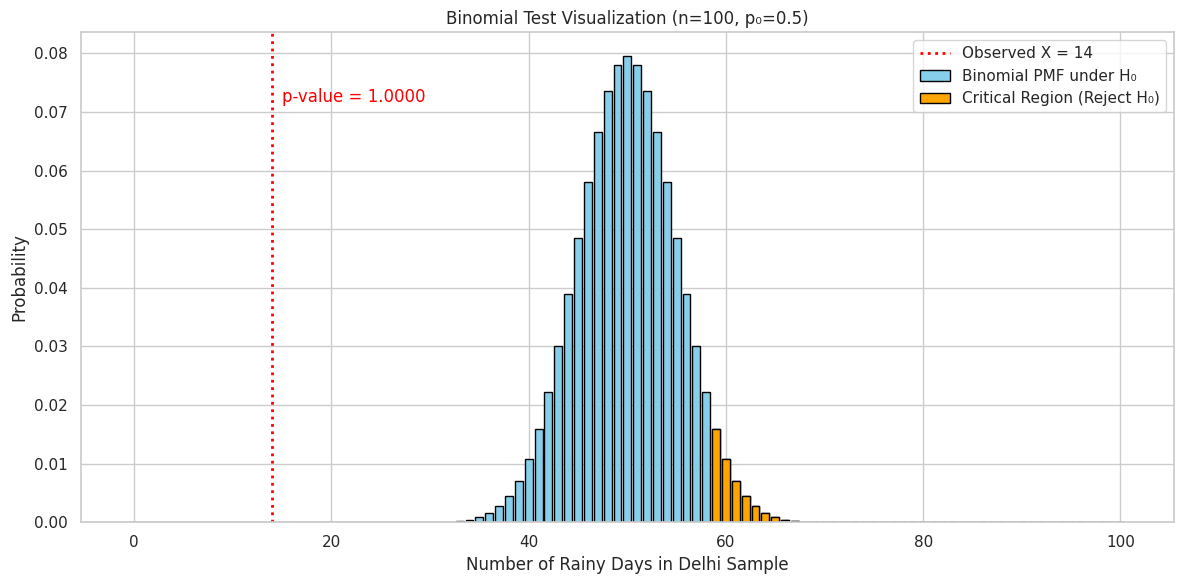

In [ ]:
sns.set(style='whitegrid')

x_vals = np.arange(0, n + 1)
pmf_vals = binom.pmf(x_vals, n, p0)

# Plot the binomial distribution under H0
plt.figure(figsize=(12, 6))
plt.bar(x_vals, pmf_vals, color='skyblue', edgecolor='black', label='Binomial PMF under H₀')

# Highlight the critical region (X >= k*)
plt.bar(x_vals[k_star:], pmf_vals[k_star:], color='orange', edgecolor='black', label='Critical Region (Reject H₀)')

# Add a line for the observed value
plt.axvline(X, color='red', linestyle=':', linewidth=2, label=f'Observed X = {X}')

# Annotate p-value
plt.text(X + 1, max(pmf_vals) * 0.9, f'p-value = {p_val:.4f}', color='red', fontsize=12)

# Add labels and title
plt.xlabel('Number of Rainy Days in Delhi Sample')
plt.ylabel('Probability')
plt.title(f'Binomial Test Visualization (n={n}, p₀={p0})')
plt.legend()
plt.tight_layout()
plt.show()